<a href="https://colab.research.google.com/github/amrhesham19/ai-projects/blob/main/face_detection_and_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip install cmake
!pip install dlib
!pip install face_recognition



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566164 sha256=21e10211fa93b9aa76ef4f2757b2ff5f308ce916b1010d76bb879da2a5e7f580
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [ ]:
import face_recognition
import cv2
from matplotlib import pyplot as plt

In [ ]:
 # Load the known images
known_image_1 = face_recognition.load_image_file("/content/image1.jpg")
known_image_2 = face_recognition.load_image_file("/content/image2.jpg")

In [ ]:

# Get the face encodings for the known images
known_encoding_1 = face_recognition.face_encodings(known_image_1)[0]
known_encoding_2 = face_recognition.face_encodings(known_image_2)[0]

In [ ]:
# Create a list of known face encodings and their names
known_face_encodings = [known_encoding_1, known_encoding_2]
known_face_names = ["cr7", "messi"]

In [ ]:
# Load the unknown image
unknown_image = face_recognition.load_image_file("/content/unknown.jpg")

In [ ]:
# Find all face locations and face encodings in the unknown image
face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

In [ ]:
# Convert the image to BGR color (which OpenCV uses)
unknown_image_bgr = cv2.cvtColor(unknown_image, cv2.COLOR_RGB2BGR)

In [ ]:
# Loop through each face found in the unknown image
for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    # See if the face is a match for the known faces
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
    name = "Unknown"

    # Use the known face with the smallest distance to the new face
    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    best_match_index = face_distances.argmin()
    if matches[best_match_index]:
        name = known_face_names[best_match_index]

    # Draw a box around the face
    cv2.rectangle(unknown_image_bgr, (left, top), (right, bottom), (0, 255, 0), 2)

    # Draw a label with the name below the face
    cv2.rectangle(unknown_image_bgr, (left, bottom - 35), (right, bottom), (0, 255, 0), cv2.FILLED)
    font = cv2.FONT_HERSHEY_DUPLEX
    cv2.putText(unknown_image_bgr, name, (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 1)

In [ ]:
# Convert the image back to RGB color (which Matplotlib uses)
unknown_image_rgb = cv2.cvtColor(unknown_image_bgr, cv2.COLOR_BGR2RGB)

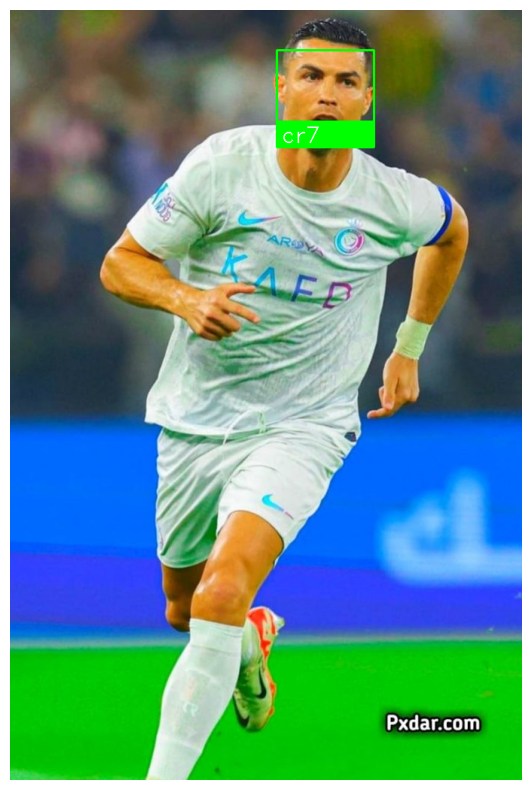

In [ ]:
# Display the image using Matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(unknown_image_rgb)
plt.axis('off')  # Hide axes ticks
plt.show()